За допомогою мережі Кохонена розв’язати задачу розпізнавання зображень. Для цього необхідно сформувати не менше 10 чорно-білих зображень розміром 5*5 (в якості зображень слід вибрати літери свого імені та прізвища, а також числа свого варіанту) і подавати на вхід нейронної мережі. При навчанні з кожним зображенням навчальної вибірки будуть співставлені деякі нейрони мережі Кохонена. В свою чергу, при подачі незалежного вектору буде вибрано нейрон-переможець, який відповідає деякому зображенню.
Ефективність роботи мережі необхідно перевірити на тестових даних. Для цього до всіх зображень навчальної вибірки слід додати шум — випадковим чином змінюючи значення пікселя зображення на протилежне. Побудувати графік залежності кількості вірно розпізнаних зображень навчальної вибірки від значення проценту шуму (відносної кількості зашумлених пікселів зображення).




In [9]:
import numpy as np
import random as rd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import copy
import pandas as pd

pixels_list = [  
                
                [ 1, 1, 1, -1, -1,
                  1, -1, -1, 1, -1,
                  1, -1, -1, 1, -1,
                  1, -1, -1, 1, -1,
                  1, 1, 1, 1, -1],#D

                [-1, -1, 1, -1, -1,   
                 -1, 1, -1, 1, -1,
                  1, -1, -1, -1, 1,
                  1, 1, 1, 1, 1,
                  1, -1, -1, -1, 1],#A

                [-1, 1, 1, -1, -1,
                 -1, 1, -1, 1, -1,
                 -1, 1, 1, -1, -1,
                 -1, 1, -1, 1, -1,
                - 1, 1, -1, 1, -1], #R

                [1, 1, 1, 1, 1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                 1, 1, 1, 1, 1], #I

                [-1, -1, 1, -1, -1,   
                 -1, 1, -1, 1, -1,
                  1, -1, -1, -1, 1,
                  1, 1, 1, 1, 1,
                  1, -1, -1, -1, 1],#A
        
                [-1, -1, -1, -1, -1,   
                 -1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1],#space

                [1, -1, -1, 1, -1,
                 1, -1, 1, -1, -1,
                 1, 1, -1, -1, -1,
                 1, -1, 1, -1, -1,
                 1, -1, -1, 1, -1], #K

                [1, 1, 1, 1, 1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                 1, 1, 1, 1, 1], #I

                [-1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1,
                  1, 1, 1, 1, 1,
                 -1, -1, -1, -1, -1], #-

                [1, 1, 1, 1, 1,
                 1, -1, -1, -1, 1,
                 1, -1, -1, -1, 1,
                 1, -1, -1, -1, 1,
                 1, 1, 1, 1, 1], #0

                 [1, 1, 1, 1, 1,
                 -1, -1, -1, -1, 1,
                  1, 1, 1, 1, 1,
                  1, -1, -1, -1, -1,
                  1, 1, 1, 1, 1], #2
                  ]

In [10]:
import random
pixels_list2 = []
for pixels in pixels_list:
    opposite_pixels = []
    for p in pixels:
        if random.random() <= 0.15:
            opposite_pixels.append(-p)
        else:
            opposite_pixels.append(p)
    pixels_list2.append(opposite_pixels)

print("\nOpposite Pixels List:")
for row in pixels_list2:
    print(row)


Opposite Pixels List:
[1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1]
[-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1]
[1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1]
[-1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1]
[1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1]
[1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1]
[1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 

In [11]:
import random
pixels_list3 = []
for pixels in pixels_list:
    opposite_pixels = []
    for p in pixels:
        if random.random() <= 0.20:
            opposite_pixels.append(-p)
        else:
            opposite_pixels.append(p)
    pixels_list3.append(opposite_pixels)

print("\nOpposite Pixels List:")
for row in pixels_list3:
    print(row)


Opposite Pixels List:
[1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1]
[-1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1]
[-1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1]
[1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1]
[-1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1]
[-1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1]
[1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1]
[1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1]
[-1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1]
[1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1]
[-1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1]


In [12]:
import random
pixels_list4 = []
for pixels in pixels_list:
    opposite_pixels = []
    for p in pixels:
        if random.random() <= 0.10:
            opposite_pixels.append(-p)
        else:
            opposite_pixels.append(p)
    pixels_list4.append(opposite_pixels)

print("\nOpposite Pixels List:")
for row in pixels_list3:
    print(row)


Opposite Pixels List:
[1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1]
[-1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1]
[-1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1]
[1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1]
[-1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1]
[-1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1]
[1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1]
[1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1]
[-1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1]
[1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1]
[-1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1]


In [13]:
Coord = [[0, 0], [0,1], [0,2], [0,3],
 [1, 0], [1,1], [1,2], [1,3],
 [2, 0], [2,1], [2,2], [2,3],
 [3, 0], [3,1], [3,2], [3,3]]
W = np.random.uniform(0,1, (16, 25))
nu0 = 0.1
t2 = 1000
sg = 2

def noise(I = []):
 print(I[0])
 pixels_list2=copy.deepcopy(I)
 for i in range(len(pixels_list)):
    for j in range(3):
        r = rd.randint(0,len(I[0])-1)
        pixels_list2[i][r]*=-1
 return pixels_list2


In [14]:
def t1(): 
    return 1000/(math.log(sg))
def nu(n):
    return nu0*math.exp(-n/t2)
def sgn(n):
    return sg*math.exp(-n/t1())
def h(n,i,j) :
    return math.exp(-math.pow(-
np.linalg.norm(np.array(Coord[i])-
np.array(Coord[j])),2)/(2*math.pow(sgn(n),2)))

def test(pixels_list=[],W=[]):
    T = []
    for q in range(len(pixels_list)):
        n=15
        min = np.linalg.norm(pixels_list[q]-W[15])
        for i in range(15):
            j = np.linalg.norm(pixels_list[q]-W[i])
            if j < min:
                min = j
                n = i
        T.append(n)
    return T

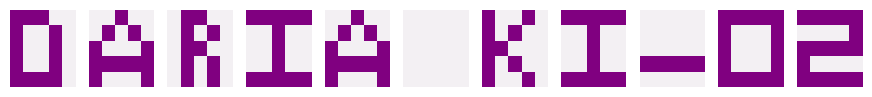

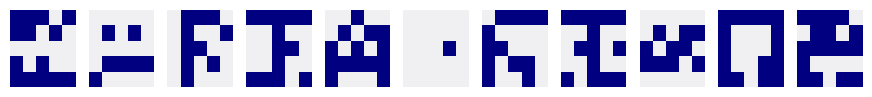

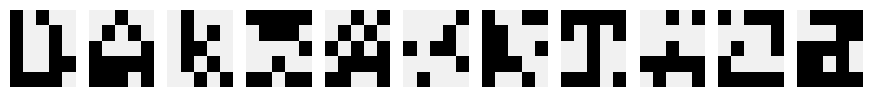

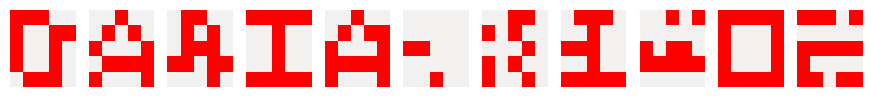

In [15]:
f, ax=plt.subplots(1,len(pixels_list), figsize = (11,1))
for ii in range(len(pixels_list)):
    sb.heatmap(np.reshape(pixels_list[ii],(5,5)), cmap = sb.light_palette("purple"), ax=ax[ii],
        cbar=False, yticklabels=False, xticklabels=False )

f2, ax=plt.subplots(1,len(pixels_list), figsize = (11,1))
for ii in range(len(pixels_list)):
    sb.heatmap(np.reshape(pixels_list2[ii],(5,5)), 
cmap = sb.light_palette("navy"), ax=ax[ii], cbar=False, yticklabels=False, xticklabels=False )

f3, ax=plt.subplots(1,len(pixels_list), figsize = (11,1))
for ii in range(len(pixels_list)):
    sb.heatmap(np.reshape(pixels_list3[ii],(5,5)), 
cmap = sb.light_palette("black"), ax=ax[ii], cbar=False, yticklabels=False, 
xticklabels=False )

f4, ax=plt.subplots(1,len(pixels_list), figsize = (11,1))
for ii in range(len(pixels_list)):
    sb.heatmap(np.reshape(pixels_list4[ii],(5,5)), 
cmap = sb.light_palette("red"), ax=ax[ii], cbar=False, yticklabels=False, 
xticklabels=False )


In [16]:
for k in range(1000):
    x = rd.randint(0, 8)
    min = np.linalg.norm(pixels_list[x]-W[11])
    n=11
    for i in range(11):
        j = np.linalg.norm(pixels_list[x]-W[i])
        if j < min:
            min = j;
            n = i
    for z in range(len(W)):
        W[z] = W[z] + nu(k)*h(k,n,z)*(pixels_list[x]-W[z])

for k in range(8000):
    x = rd.randint(0, 8)
    min = np.linalg.norm(pixels_list[x]-W[11])
    n=11
    for i in range(11):
        j = np.linalg.norm(pixels_list[x]-W[i])
        if j < min:
            min = j;
            n = i
    for z in range(len(W)):
            W[z] = W[z] + 0.1*h(k,n,z)*(pixels_list[x]-W[z])


In [17]:
Test=test(pixels_list,W)
Test2=test(pixels_list2,W)
Test3=test(pixels_list3, W)
Test4=test(pixels_list4, W)

er2 = []
er3 = []
er4 = []
 
for ii in range(len(pixels_list)):
    ht=[]
    ht2=[]
    ht3=[]
    ht4=[]
    x=pixels_list[ii]
    y=pixels_list2[ii]
    z=pixels_list3[ii]
    v=pixels_list4[ii]

    num=0
    n=Test[ii]
    i=j=0

    for i in range(4):
        ht.append([])
        for j in range(4):
            ht[i].append(h(k,n,num))
            num+=1
    num = 0
    n = Test2[ii]
    n1 = Test3[ii]
    n2 = Test4[ii]
    i=j=0
    for i in range(4):
        ht2.append([])
        ht3.append([])
        ht4.append([])
        for j in range(4):
            ht2[i].append(h(k,n,num))
            ht3[i].append(h(k,n1,num))
            ht4[i].append(h(k,n2,num))
            num+=1
 
    if (ht==ht2): 
        er2.append(1) 
    else: er2.append(0)
    if (ht==ht3): 
        er3.append(1) 
    else: er3.append(0)
    if (ht==ht4): 
        er4.append(1) 
    else: er4.append(0)


In [18]:
symbols = ['D','A','R','I','A','','K','I','-','0','2']
df = pd.DataFrame(list(zip(er2, er3, er4)), columns =['2 changes', '3 changes', '4 changes'], index = symbols)

for col in df.columns:
    df[col]=df[col].map({1:True, 0:False})
print('\n',df)
print(f'\n15% changes: {er2.count(1)} -correct | {er2.count(0)} - false | accuracy is {er2.count(1)/11:.3f}') 
print(f'20% changes: {er3.count(1)} - correct | {er3.count(0)} - false | accuracy is {er3.count(1)/11:.3f}')
print(f'10% changes: {er4.count(1)} - correct | {er4.count(0)} - false | accuracy is {er4.count(1)/11:.3f}')



    2 changes  3 changes  4 changes
D      False       True       True
A      False       True       True
R       True       True       True
I       True      False       True
A       True      False       True
        True      False      False
K      False      False      False
I      False       True      False
-      False      False      False
0       True      False       True
2      False       True       True

15% changes: 5 -correct | 6 - false | accuracy is 0.455
20% changes: 5 - correct | 6 - false | accuracy is 0.455
10% changes: 7 - correct | 4 - false | accuracy is 0.636
